In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Inferring N95-mode Results from N99-mode Results and Filtration Efficiency

## What is Quantitative Fit Testing? What is a Fit Factor?

Quantitative Fit Testing (QNFT) helps people figure out how protective a mask is on their face. A sampling tube is attached to a probe on the mask to sample the concentration inside the mask, while another sampling tube samples the air right outside the mask. Dividing the concentration of the outside air, $C_\text{ambient}$, by the concentration of the air within the mask, $C_\text{mask}$, tells us how many more times cleaner the air is when wearing a mask vs. when not wearing a mask. This particular measurement is called the fit factor:

$$
\begin{equation}
\begin{aligned}
    \text{FF} &= \frac{C_\text{ambient}}{C_\text{mask}}
\end{aligned}
\end{equation}
$$


## N95-mode vs N99-mode

<center>
    <img src="https://breathesafe.s3.us-east-2.amazonaws.com/images/inferring-n95-mode-fit-factors/size-ranges.png">
</center>

QNFT enthusiasts are likely to own a TSI PortaCount. A PortaCount samples aerosols between 0.02 to 1 microns. The Most Penetrating Particle Sizes (i.e. the hardest to filter) are between 0.1 and 0.3 microns. There are two modes of measurement for a PortaCount: N99 mode and N95 mode. N99 tests both filtration efficiency of the media and leakage. While breathing in, particles can exist within the mask either because the filter being used is relatively weak or air with particles bypassed the filter via a gap. N95 filters have a lower bound of 95% filtration efficiency at MPPS. On the other hand, N99 filters have a lower bound of 99% at MPPS. N100 have even more stringent lower bounds at 99.97%. The better the filter being used with the mask, the less likely a particle within the mask had passed through the filter, and the more likely the particle came from leakage. In other words, when using N99 mode, the better the filter being used, the more the "fit factor" is actually about fit.

N95-mode testing, on the other hand, makes it easier to focus on the "fit" of the "fit factor" for weaker filters by focusing sampling on really-easy-to-filter particle sizes (E.g. 0.04 microns) using the N95 Companion.   

<center>
    <img src="https://breathesafe.s3.us-east-2.amazonaws.com/images/inferring-n95-mode-fit-factors/typical-efficiency-curve.png">
</center>

See [this wonderful few pages from TSI](https://www.yumpu.com/en/document/read/5308400/n95-companion-model-8095-application-note-iti-053-tsicom) to understand the difference between N99 and N95 mode.
When N99 filters or   To appreciate the difference between the two, note that 

## Why does the distinction matter?

For airborne pathogens, they are likely to be suspended in the air by riding aerosols with the size of 0.3 microns and above. **When wearing an N95, using N95-mode to get fit factors is a better estimate of protection against bioaerosols compared to using N99-mode.** However, most amateur PortaCount owners have N99 mode by default. Reporting N99-mode results underestimates the efficacy of N95 respirators against bioaerosols like SARS-CoV-2, TB, Flu, etc.

## Workaround

N95-mode fit factors can be bounded using N99-mode fit-testing results and filtration efficiency data. The concentration inside the mask $C(t)$ is as follows:

$$
\begin{equation}
\begin{aligned}
C(t) &= C_\text{ambient} \cdot \frac{ Q_\text{ambient}}{Q_\text{ambient} + Q_\text{filtered}} \\
&+ C_\text{filtered} \cdot \frac{ Q_\text{filtered}}{Q_\text{filtered} + Q_\text{filtered}} \\
\end{aligned}
\end{equation}
$$



| Variable | Explanation | Unit |
| - | - | - |
| $C_{\text{ambient}}$ | The concentration of particles outside the mask | # particles / $\text{cm}^3$ |
| $Q_{\text{ambient}}$ | Volume of air coming in from leaks per minute | $\text{cm}^3 / \text{min}$ |
| $C_{\text{filtered}}$ | The concentration of particles right after air goes through the filter | # particles / $\text{cm}^3$ |
| $Q_{\text{filtered}}$ | Volume of air coming through the filter per minute | $\text{cm}^3 / \text{min}$ 

## Derivation

Someone is breathing with a mask on:

<center>
    <img src="https://breathesafe.s3.us-east-2.amazonaws.com/images/inferring-n95-mode-fit-factors/mask-leakage-and-filtration.jpeg" width='500'>
</center>

The mask can be thought of as a (really small) house with air coming in. Some are going through the filter (e.g. N95) while some go through the window (i.e. leakage):

<center>
    <img src="https://breathesafe.s3.us-east-2.amazonaws.com/images/inferring-n95-mode-fit-factors/house-with-a-filter-and-window-open.jpeg" width='500'>
</center>

Air from the outside has some concentration:

<center>
    <img src="https://breathesafe.s3.us-east-2.amazonaws.com/images/inferring-n95-mode-fit-factors/outdoor-particle-count.jpeg" width='500'>
</center>

While inside, we can sample the two air sources right as they get inside. Some of the air goes through the filter, and some don't (i.e. leakage):

<center>
    <img src="https://breathesafe.s3.us-east-2.amazonaws.com/images/inferring-n95-mode-fit-factors/indoor-particle-count.jpeg" width='750'>
</center>


$$
\begin{equation}
\begin{aligned}
\frac{dC(t)}{dt} &= \frac{C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(t) \cdot (Q_\text{ambient} + Q_\text{filtered})}{V}
\end{aligned}
\end{equation}
$$


The above describes the data generating process. Air is being added into the system due to gaps ($Q_\text{ambient}$). The number of particles being introduced due to gaps is $Q_\text{ambient} \cdot C_\text{ambient}$. In terms of units, we get $\text{\# particles} / \text{cm}^3 \cdot  \text{cm}^3 / \text{min} = \text{\# particles} / \text{min}$ .
Air is also being added into the system via the filter. The number of particles that got in the mask via the filter is $Q_\text{filtered} \cdot C_\text{filtered}$, which also has the units $\text{\# particles} / \text{min}$. An equivalent amount of air is being removed from the system (i.e. $C(t) \cdot (Q_\text{ambient} + Q_\text{filtered})$). That also has $\text{\# particles} / \text{min}$ units. Dividing by the volume $V$, we get $\text{\# particles} / \text{cm}^3 / \text{min}$.

$$
\begin{equation}
\begin{aligned}
\frac{dC(t)}{dt} &= \frac{C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(t) \cdot (Q_\text{ambient} + Q_\text{filtered})}{V} \\
V \cdot \frac{dC(t)}{dt} &= C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(t) \cdot (Q_\text{ambient} + Q_\text{filtered}) \\
B_t &= C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(t) \cdot (Q_\text{ambient} + Q_\text{filtered}) \\
B_0 &= C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(0) \cdot (Q_\text{ambient} + Q_\text{filtered}) \\
\frac{dBt}{dt} &= -(Q_\text{ambient} + Q_\text{filtered}) \frac{dC_t}{dt} \\
\frac{1}{-(Q_\text{ambient} + Q_\text{filtered})} \frac{dB_t}{dt} &= \frac{dC_t}{dt} \\
\frac{V}{-(Q_\text{ambient} + Q_\text{filtered})} \frac{dB_t}{dt} &= B_t \\
\frac{dB_t}{B_t} &= \frac{-(Q_\text{ambient} + Q_\text{filtered})}{V} dt \\
dlog(B_t) &= \frac{-(Q_\text{ambient} + Q_\text{filtered})}{V} dt \\
log(B_t) - log(B_0) &= \frac{-(Q_\text{ambient} + Q_\text{filtered})}{V} dt \\
e^{log(B_t) - log(B_0)} &= e^{( -(Q_\text{ambient} + Q_\text{filtered}) ) / V \cdot t}  \\
\frac{B_t}{B_0} &= e^{( -(Q_\text{ambient} + Q_\text{filtered}) ) / V \cdot t}  \\
\frac{C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(t) \cdot (Q_\text{ambient} + Q_\text{filtered}) }{C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(0) \cdot (Q_\text{ambient} + Q_\text{filtered})} &= e^{(-Q_\text{ambient} + Q_\text{filtered }) / V \cdot t}
\end{aligned}
\end{equation}
$$



Since $V$ (i.e. the volume of air between the mask and the face) is very small relative to the total amount of air being breathed in, then the right hand side goes to 0:
$$
\begin{equation}
\begin{aligned}
\frac{C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(t) \cdot (Q_\text{ambient} + Q_\text{filtered}) }{C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(0) \cdot (Q_\text{ambient} + Q_\text{filtered})} &= 0 \\
C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} - C(t) \cdot (Q_\text{ambient} + Q_\text{filtered})  &= 0 \\
C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered} &= C(t) \cdot (Q_\text{ambient} + Q_\text{filtered})  \\
\frac{C_\text{ambient} \cdot Q_\text{ambient} + C_\text{filtered} \cdot Q_\text{filtered}}{Q_\text{ambient} + Q_\text{filtered}} &= C(t)   \\
C(t) &= C_\text{ambient} \cdot \frac{ Q_\text{ambient}}{Q_\text{ambient} + Q_\text{filtered}} \\
&+ C_\text{filtered} \cdot \frac{ Q_\text{filtered}}{Q_\text{ambient} + Q_\text{filtered}} \\
\end{aligned}
\end{equation}
$$

From here we can see that the concentration inside the mask is a weighted average of the ambient concentration $C_\text{ambient}$ and the filtered concentration $C_\text{filtered}$.



## Concentration within the mask under N99 mode for an N95 filter

With a weaker filter like an N95, $C_\text{filtered}$ is non 0:

$$
\begin{equation}
\begin{aligned}
C_\text{N99-mode}(t) &= C_\text{ambient} \cdot \frac{ Q_\text{ambient}}{Q_\text{ambient} + Q_\text{filtered}} \\
&+ C_\text{filtered} \cdot \frac{ Q_\text{filtered}}{Q_\text{ambient} + Q_\text{filtered}} \\
\end{aligned}
\end{equation}
$$



## Concentration within the mask under N95-mode for an N95 filter

When using N95-mode testing, the particles are filtered to very-easy-to-filter particles, so $C_\text{filtered}$ is essentially 0:

$$
\begin{equation}
\begin{aligned}
C_\text{N95-mode}(t) &= C_\text{ambient} \cdot \frac{ Q_\text{ambient}}{Q_\text{ambient} + Q_\text{filtered}} \\
&+ C_\text{filtered} \cdot \frac{ Q_\text{filtered}}{Q_\text{ambient} + Q_\text{filtered}} \\
&= C_\text{ambient} \cdot \frac{ Q_\text{ambient}}{Q_\text{ambient} + Q_\text{filtered}} \\
\end{aligned}
\end{equation}
$$

## N95-mode Fit Factor

$$
\begin{equation}
\begin{aligned}
FF_\text{N95-mode} &= \frac{C_\text{ambient}} {C_\text{ambient} \cdot \frac{ Q_\text{ambient}}{Q_\text{ambient} + Q_\text{filtered}}} \\ 
&= \frac{1} {\frac{ Q_\text{ambient}}{Q_\text{ambient} + Q_\text{filtered}}} \\ 
&= \frac{{Q_\text{ambient} + Q_\text{filtered}}}{Q_\text{ambient}} \\ 
\end{aligned}
\end{equation}
$$

The N95-mode fit factor is the overall rate of air coming in divided by the rate of air total leakage. 


## Fit Factor N99-mode

In [155]:
def ff_n99(
    filtered_air_delivery_rate_proportion,
    overall_filtration_efficiency
):
    """
    Gives the exposure reduction factor when wearing a mask that has some known
    average filtration efficiency and we know the proportion of air that is going 
    through the filter (instead of leaks).

    Parameters:
        filtered_air_delivery_rate_proportion: float
            Some number between 0 and 1. This is the air delivery rate going through the filter 
            divided by the sum of air delivery rate going through the filter and air delivery rate 
            bypassing the filter.

        overall_filtration_efficiency: float
            Some number between 0 and 1. For each particle size, a mask has a particular filtration efficiency.
            The most-penetrating particle size (MPPS) has the hardest to filter particles. At MPPS, an N95
            respirator has at least 95% filtration efficiency, and at others, could have way higher filtration 
            efficiency.

            Number of particles remaining, K, after going through the filter is a sum: \\sum_s (1 - F_e(s)) \\cdot N(s)
                where F_e(s) is the filtration efficiency at a particular particle size bin s,
                N(s) is the number of particles belonging to bin s.

            The overall filtration efficiency then is (\\sum_s N(s) - K) / (\\sum_s N(s))
    """
    return 1 / (
        (1 - filtered_air_delivery_rate_proportion) + (1 - overall_filtration_efficiency) * filtered_air_delivery_rate_proportion
    )
    

If all the air goes through the filter (i.e. no gaps), and the average filtration efficiency is 99%, then 1% is left over, i.e. $FF_{\text{N99}} = 100$

In [9]:
ff_n99(
    filtered_air_delivery_rate_proportion=1, 
    average_filtration_efficiency=0.99
)

99.99999999999991

If all the air goes through gaps, then $FF_{\text{N99}} = 1$

In [156]:
ff_n99(
    filtered_air_delivery_rate_proportion=0, 
    overall_filtration_efficiency=0.99
)

1.0

In [12]:
def find_air_delivery_rate_filtered(
    c_ambient,
    c_mask,
    filtration_efficiency,
    air_delivery_rate=6000,
):
    """
    Parameters:
        c_mask: float
            The concentration within the mask (# particles / cm3)

        c_ambient: float
            The concentration outside the mask (# particles / cm3)

        filtration_efficiency: float
            The single pass filtration efficiency of the filter.

        air_delivery_rate: float
            The amount being breathed in (e.g. cm3/min). Defaults to 6000 cm3 / min.
            
    Returns: float
        The air delivery rate. The rate of volume of air that is going through the filter (cm3 / min)
    """

    return air_delivery_rate * (c_ambient - c_mask) / (c_ambient * filtration_efficiency)
    

If we observe a fit factor of 20, and the mask has a 95% filtration efficiency, then all the air must have gone through the filter:

In [13]:
find_air_delivery_rate_filtered(
    c_ambient = 1000,
    c_mask = 50,
    filtration_efficiency=0.95,
    air_delivery_rate=6000
)

6000.0

In [14]:
find_air_delivery_rate_filtered(
    c_ambient = 1000,
    c_mask = 60,
    filtration_efficiency=0.95,
    air_delivery_rate=6000
)

5936.8421052631575

We modify $FF_{\text{N99}}$ by updating `c_ambient` and `c_mask`. We keep `air_delivery_rate_constant`. We also update filtration efficiency. Then we compute the proportion of air leaked.

In [71]:
c_ambient = 10000

In [179]:
c_masks = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

In [180]:
filt_eff_range = [0.95, 0.96, 0.97, 0.98, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999]

In [181]:
collection = []
air_delivery_rate = 6000 # 6 liters per minute breathing 

for c_mask in c_masks:
    row = []
    
    for filt_eff in filt_eff_range:
        fraction = find_air_delivery_rate_filtered(
                c_ambient = c_ambient,
                c_mask = c_mask,
                filtration_efficiency=filt_eff,
                air_delivery_rate=air_delivery_rate
            ) / air_delivery_rate

        if fraction > 1:
            fraction = np.nan
            
        row.append(
            fraction
        )


    collection.append(row)

In [182]:
df = pd.DataFrame(
    collection
)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999499
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.998999
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999499,0.998498
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.998998,0.997998
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999498,0.998497,0.997497
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.998997,0.997996,0.996997
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999498,0.998495,0.997495,0.996496


In [183]:
df.columns = filt_eff_range

In [184]:
df

,0.950,0.960,0.970,0.980,0.990,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999499
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.998999
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999499,0.998498
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.998998,0.997998
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999498,0.998497,0.997497
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.998997,0.997996,0.996997
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999498,0.998495,0.997495,0.996496


In [185]:
c_ambient

10000

In [186]:
df.index = np.round(c_ambient / np.array(c_masks), 5)

In [187]:
df

,0.950,0.960,0.970,0.980,0.990,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999
10000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
666.66667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999499
500.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.998999
400.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999499,0.998498
333.33333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.998998,0.997998
285.71429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999498,0.998497,0.997497
250.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.998997,0.997996,0.996997
222.22222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999498,0.998495,0.997495,0.996496


Text(0.5, 80.7222222222222, 'Filtration efficiency')

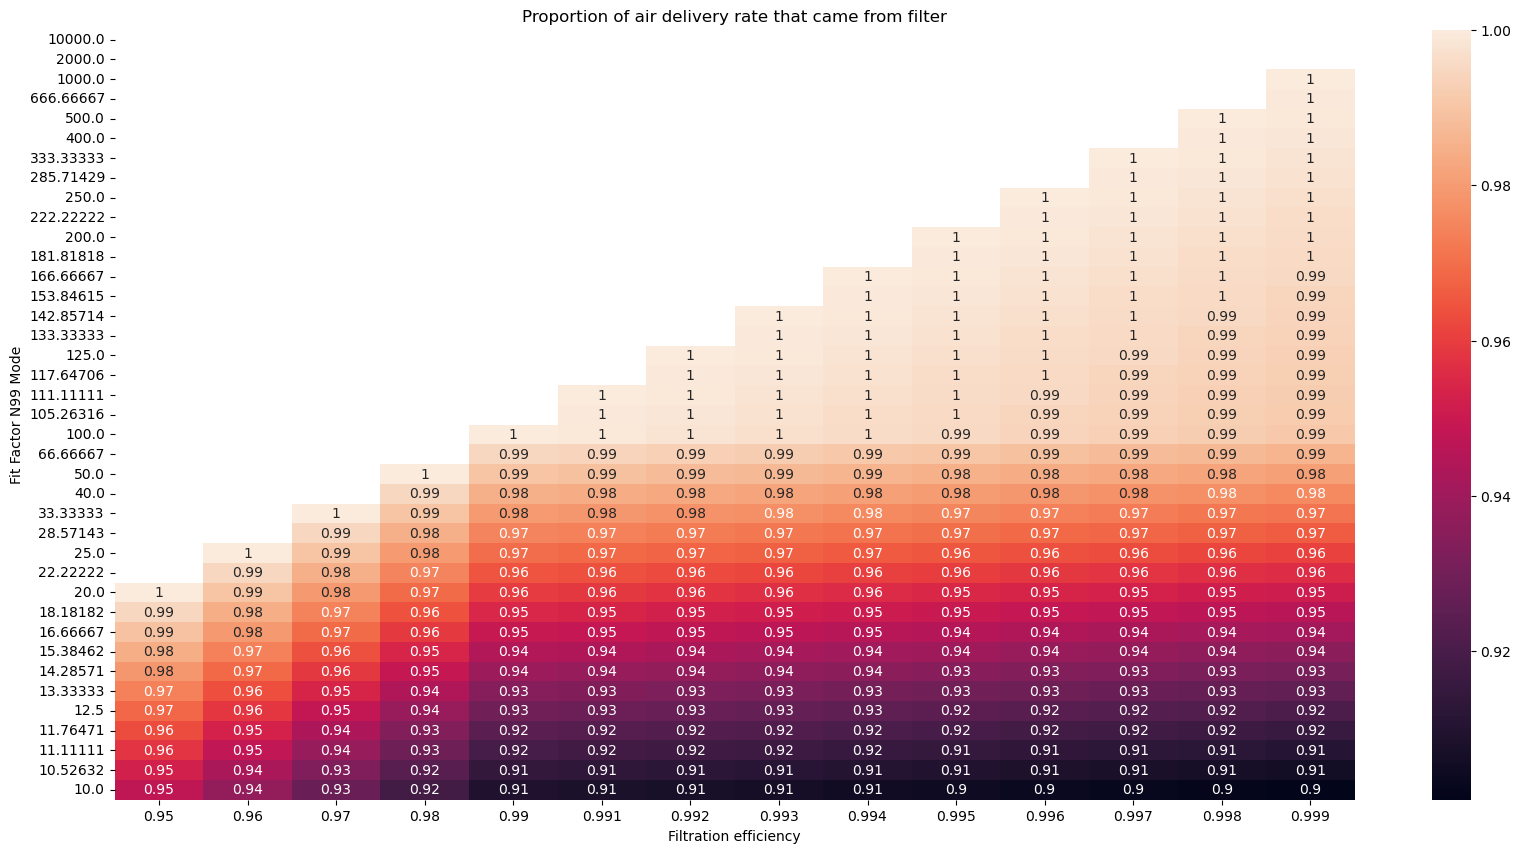

In [188]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.heatmap(df, annot=True, ax=ax)
ax.set_title("Proportion of air delivery rate that came from filter")
ax.set_ylabel("Fit Factor N99 Mode")
ax.set_xlabel("Filtration efficiency")
# ax.set_xticklabels('Single pass filtration efficiency')

In [189]:
n95_fit_factors = 1 / (1 - df)

Text(0.5, 1.0, 'Predicted N95-mode Fit Factor by Overall Filtration Efficiency and N99-mode Fit Factor')

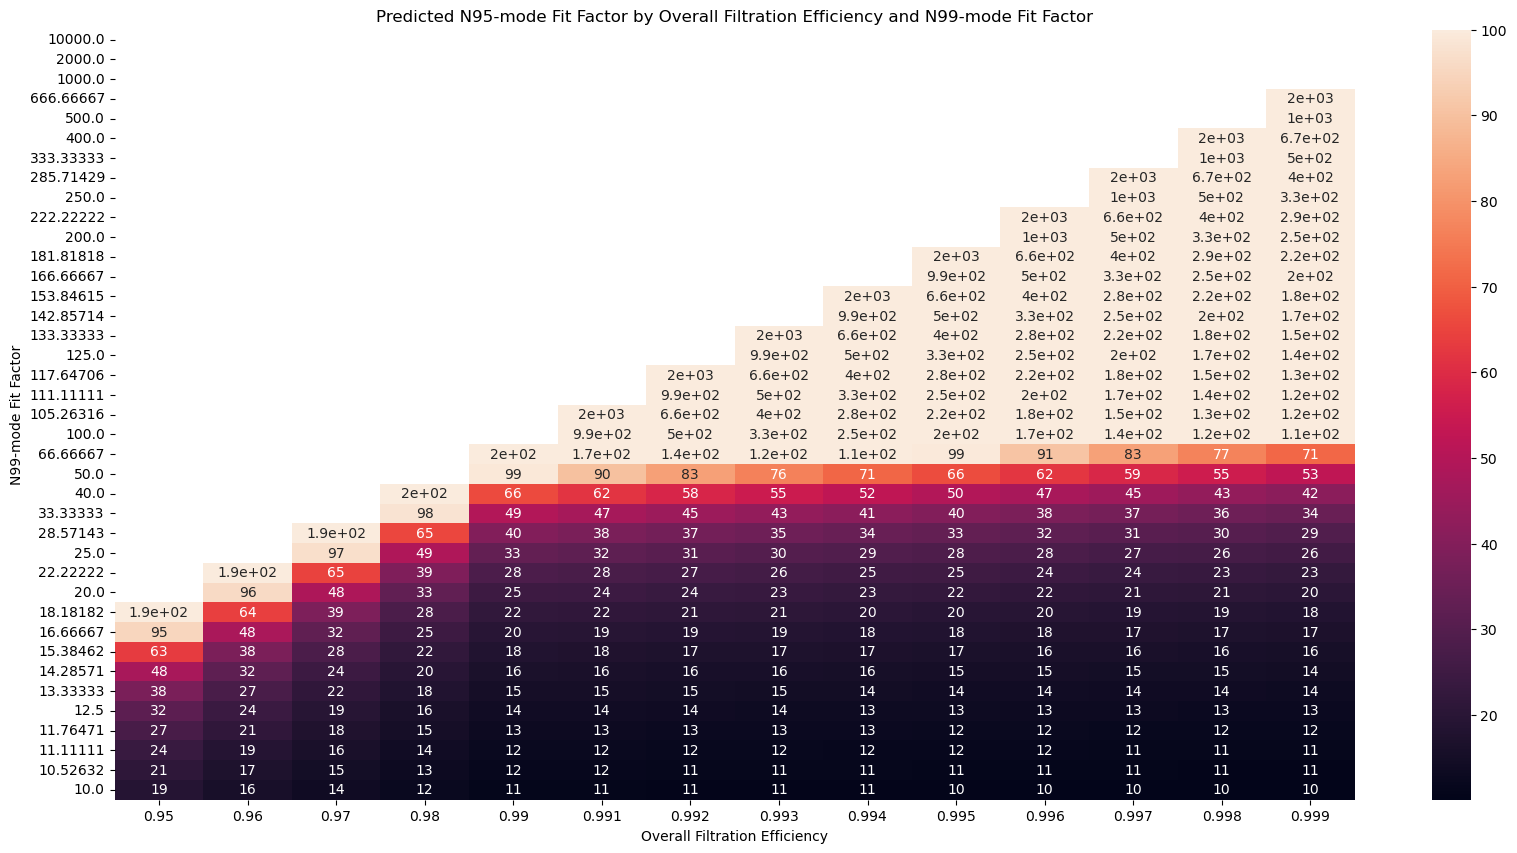

In [190]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.heatmap(
    n95_fit_factors,
    vmax=100,
    annot=True,
    ax=ax
)
ax.set_xlabel('Overall Filtration Efficiency')
ax.set_ylabel("N99-mode Fit Factor")
ax.set_title("Predicted N95-mode Fit Factor by Overall Filtration Efficiency and N99-mode Fit Factor")